# Assignment 1 - Part B:*TooBike* model (60/100 marks)

## Overview
You will be creating and analysing a bikeshare model for Toowoomba City Council (TCC). Your TCC bikeshare model will build on the bikeshare models presented in Chapters 2-4 of the ModSimPy book. 

#### Toowoomba Bikeshare - *TooBike* 
Toowoomba's reputation as a Garden City makes it a very popular tourist spot. TCC is interested in developing a bikeshare system for Toowoomba.  Toowoomba's well-maintained bike trails and bikelanes on main streets are popular with residents and may also be popular with tourists.

TCC wants to explore possible bike share scenarios which can accomadate both tourists and residents.  For the inital *TooBike* trial, the council's financial advisors have agreed to fund **3 locations** and **45 bikes**.


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(0)

## B1: _TooBike_ Bikeshare Locations (10 marks)

- Choose 3 potential bikeshare locations in Toowoomba which you consider good pick-up or drop-off locations for both tourists and residents. 
  - For each location, justify your selection. Explain why this location is a good pick-up or drop-off point for both tourists and residents. 

*Discuss proposed bikeshare locations in this Markdown cell. For help with [using Markdown:](https://help.github.com/en/articles/basic-writing-and-formatting-syntax)* 

The first pick up and drop off bike station location chosen is USQ as it is toward the south of the city and has a lot of students and their families travelling there. Given that the University has a lot of international students, this is particularly important as few of them will be importing their cars (https://www.usq.edu.au/news/2017/03/ariful-hasan). A lot of tourists visit the University and its associated area due to the number of international students. A lot of residents will be travelling to the university to study. To add further it is located at the southern end of the city, which means that as long as the other two stations are dispersed throughout the city it should provide a nice general spread of stations.

The second location chosen is the Greyhound bus terminal as it is both in the center of the city and a common arrival and departure destination for tourists and residents alike (http://www.tr.qld.gov.au/our-region/transport/buses/10018-toowoomba-bus-station). For those without a car it is the primary way they get in and out of the city, and people using bikes are less likely to have a car. Residential and international students as well as residents often arrive in the city from the terminal after catching a flight to Brisbane airport and then a bus to Toowoomba. It is also very conveniently located in the middle of the city near the shopping centers and such, so makes a good midway point. 

The third and final location chosen is the Wilsonton shopping centre, chosen as its location makes a nice triangle with the other areas of the city as it is located in the North-West of the city. Furthermore, it is a shopping centre near a school so should get a lot of traffic. Although these locations do not service the whole city, they are probably the best compromise given that only three stations are possible in this model.

In conclusion, USQ is the southern station, Greyhound is the middle station and Wilsonton is the North-Western station making a triangle with the other three. Although these locations do not service the whole city, they are probably the best compromise given that only three stations are possible in this model.


## B2: _Initial TooBike Model_ (20 marks)
Create your initial *TooBike* model with your selected bikeshare locations. Your model must include each of the functions, listed below, modified as necessary to model 3 bikeshare locations, instead of 2.

The bikeshare model functions provided below were copied from Ch 2-4 models. 

- `make_state()`:  
   adapt to simulate 3 locations **and** include function parameters so that the number of initial bikes for each location can be passed to the function.

- `def step(state, p1, p2)`:  
   adapt to simulate travel probabilities from->to 3 locations   
   *Hint: you will need more than 3 probabilities*
   
- `def bike_to_XXXX(state)`:  
   create as many new functions as necessary to model travelling from->to for 3 bikeshare locations. 

- `def run_simulation(p1, p2, num_steps)`:  
   adapt to simulate 3 locations  


In [2]:
def make_state(Wilsonton,USQ,Greyhound):
    """Create a state object.
    wilsonton: Number of bikes at woolworths shopping centre.
    usq: Number of bikes at usq campus.
    bus: Number of bikes at city library.
    wilsonton_empty: The number of people who miss out on a bike. Initiates at 0.
    usq_empty: The number of people who miss out on a bike. Initiates at 0.
    greyhound_empty: The number of people who miss out on a bike. initiates at 0.
    """
    state = State(wilsonton=Wilsonton,usq=USQ,greyhound=Greyhound,wilsonton_empty=0,usq_empty=0,greyhound_empty=0)
    return state

def step(state, p1, p2, p3, p4, p5, p6):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an wilsonton->usq customer arrival
    p2: probability of an wilsonton->greyhound customer arrival
    p3: probability of an usq->wilsonton customer arrival
    p4: probability of an usq->greyhound customer arrival
    p5: probability of an greyhound->wilsonton customer arrival
    p6: probability of an greyhound->usq customer arrival
    """
    
    # If any of the below flips succeed given their input probabilities, p1 to p6, run the associated function.
    if flip(p1):
        bike_from_wilsonton_to_usq(state)
    
    if flip(p2):
        bike_from_wilsonton_to_greyhound(state)
        
    if flip(p3):
        bike_from_usq_to_wilsonton(state)
        
    if flip(p4):
        bike_from_usq_to_greyhound(state)
    
    if flip(p5):
        bike_from_greyhound_to_wilsonton(state)
    
    if flip(p6):
        bike_from_greyhound_to_usq(state)
        
def bike_from_wilsonton_to_usq(state):
    """Move one bike from Wilsonton to USQ.
    
    state: bikeshare State object
    """
    if state.wilsonton == 0:
        state.wilsonton_empty += 1
        return
    state.wilsonton -= 1
    state.usq += 1       

def bike_from_wilsonton_to_greyhound(state):
    """Move one bike from Wilsonton to Greyhound.
    
    state: bikeshare State object
    """
    if state.wilsonton == 0:
        state.wilsonton_empty += 1
        return
    state.wilsonton -= 1
    state.greyhound += 1

def bike_from_usq_to_wilsonton(state):
    """Move one bike from USQ to Wilsonton.
    
    state: bikeshare State object
    """
    if state.usq == 0:
        state.usq_empty += 1
        return
    state.usq -= 1
    state.wilsonton += 1

def bike_from_usq_to_greyhound(state):
    """Move one bike from USQ to Greyhound.
    
    state: bikeshare State object
    """
    if state.usq == 0:
        state.usq_empty += 1
        return
    state.usq -= 1
    state.greyhound += 1

def bike_from_greyhound_to_wilsonton(state):
    """Move one bike from Greyhound to Wilsonton.
    
    state: bikeshare State object
    """
    if state.greyhound == 0:
        state.greyhound_empty += 1
        return
    state.greyhound -= 1
    state.wilsonton += 1

def bike_from_greyhound_to_usq(state):
    """Move one bike from Greyhound to USQ.
    
    state: bikeshare State object
    """
    if state.greyhound == 0:
        state.greyhound_empty += 1
        return
    state.greyhound -= 1
    state.usq += 1
    
    
def run_simulation(state, p1, p2, p3, p4, p5, p6, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an wilsonton->usq customer arrival
    p2: probability of an wilsonton->greyhound customer arrival
    p3: probability of an usq->wilsonton customer arrival
    p4: probability of an usq->greyhound customer arrival
    p5: probability of an greyhound->wilsonton customer arrival
    p6: probability of an greyhound->usq customer arrival
    num_steps: number of time steps
    """
    
    # For the amount of steps chosen simulate a time step
    for i in range(num_steps):
        step(state, p1, p2, p3, p4, p5, p6)
    
    return state
    
def run_multiple_simulations(state, p1, p2, p3, p4, p5, p6, num_steps, num_runs):
    """Run simulation given number of runs with provided model parameters.
    
    state: bikeshare State object
    p1: probability of an wilsonton->usq customer arrival
    p2: probability of an wilsonton->greyhound customer arrival
    p3: probability of an usq->wilsonton customer arrival
    p4: probability of an usq->greyhound customer arrival
    p5: probability of an greyhound->wilsonton customer arrival
    p6: probability of an greyhound->usq customer arrival
    num_steps: number of time steps
    num_runs: number of simulation runs
    results: Aggregated results for number of bikes at each station, saved as a string.
    resultsT1 = Simulation results for number of bikes at Wilsonton.
    resultsT2 = Simulation results for number of bikes at USQ.
    resultsT3 = Simulation results for number of bikes at Greyhound.
    """  
    
    #Initialize TimeSeries arrays for later data loading.
    results = TimeSeries()
    resultsT1 = TimeSeries()
    resultsT2 = TimeSeries()
    resultsT3 = TimeSeries()
    
    #For every run, run the simulation and store results in TimeSeries for Wilsonton, USQ and Greyhound.
    for i in range(num_runs):
        state = run_simulation(state, p1, p2, p3, p4, p5, p6, num_steps)
        resultsT1[i] = state.wilsonton
        resultsT2[i] = state.usq
        resultsT3[i] = state.greyhound
    
    #Aggregate the code into one TimeSeries array. This is so it fits the template provided.
    for i in range(len(resultsT1)):
        results[i] = "Wilsonton =" + str(resultsT1[i]), "USQ= " + str(resultsT2[i]), "Greyhound= " + str(resultsT3[i])
    
    return results

### Run simulation
**_How many bikes does each bike station have after one hour?_**

Now that you've created a new bikeshare model with 3 locations, let's take it for a ride and checkout some initial metrics.  

> Update the old `make_state` and `run_simulation` function calls below to match your new model functions.  

- Create a state object using your `make_state` function.  Divide the 45 bikes equally across your locations.  
- Run a simulation with 60 steps. Use 0.3 for all of your probability values.

In [3]:
# Upate these functions
state = make_state(15,15,15)
state = run_simulation(state, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 60)
run_multiple_simulations(state, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 60, 5)

,values
0,"(Wilsonton =0, USQ= 17, Greyhound= 28)"
1,"(Wilsonton =2, USQ= 22, Greyhound= 21)"
2,"(Wilsonton =7, USQ= 25, Greyhound= 13)"
3,"(Wilsonton =9, USQ= 25, Greyhound= 11)"
4,"(Wilsonton =15, USQ= 30, Greyhound= 0)"


### B3: Plot Bike usage over a 24 hour period (5 marks)

Now let's run multiple simulations and plot the number of bikes at each of our bike stations over a 24 hour period.  We're trying to see how our inital 0.3 probabilites for all three bikestations works out.
** Hint similar to chap03 notebook **

> Update the code below, replacing ???, to work with your model parameter and functions.
  - Update the `make_state()` and `run_simulation(state, p1, p2, num_steps)` functions
  - Add your station names where indicated.
  

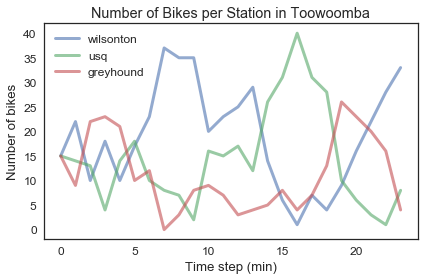

In [4]:
# Initialise TimeSeries() arrays to track bikes at each station
resultsBS1 = TimeSeries()
resultsBS2 = TimeSeries()
resultsBS3 = TimeSeries()

# Load first set of values into TimeSeries arrays and state object
state = make_state(15,15,15) # 15 was chosen as it was used in the example above. 15 bikes to start at each station.
resultsBS1[0] = state.wilsonton
resultsBS2[0] = state.usq
resultsBS3[0] = state.greyhound

num_runs = 24  # model 24 simulations, each 60 minutes long to represent 24 hours.
num_steps = 60 # For every simulation, make 60 time steps to represent the 60 minutes.

# For every time the experiment is run, load the results data into TimeSeries arrays associated with each bike station.
for i in range(1, num_runs):
    state = run_simulation(state,0.3, 0.3, 0.3, 0.3, 0.3, 0.3, num_steps)    
    resultsBS1[i] = state.wilsonton
    resultsBS2[i] = state.usq
    resultsBS3[i] = state.greyhound

# Update plot labels as appropriate
plot(resultsBS1, label='wilsonton')
plot(resultsBS2, label='usq')
plot(resultsBS3, label='greyhound')
decorate(title='Number of Bikes per Station in Toowoomba',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

### B4: Plot *Unhappy Customers* over a 24 hour period (5 marks)

Now let's run multiple simulations and plot the number of unhappy customers at each of our locations over time.  Copy your code solution for B3 and change it to track the number of unhappy customers.

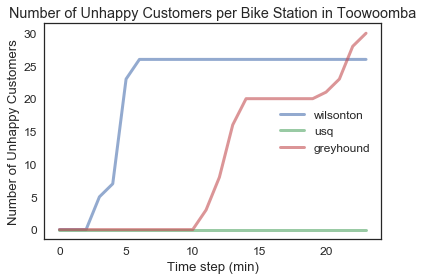

In [5]:
# Create a time series for wilsonton, usq and greyhound unhappy customers who did not have a bike available.
resultsU1 = TimeSeries()
resultsU2 = TimeSeries()
resultsU3 = TimeSeries()

# Load first set of values into TimeSeries arrays and state object.
state = make_state(15,15,15) # 15 was chosen as it was used in the example above. 15 bikes to start at each station.
resultsU1[0] = state.wilsonton_empty
resultsU2[0] = state.usq_empty
resultsU3[0] = state.greyhound_empty

num_runs = 24  # model 24 simulations, each 60 minutes long to represent 24 hours.
num_steps = 60 # For every simulation, make 60 time steps to represent the 60 minutes.

# For every run, simulate the no. of unhappy customers per station and store in TimeSeries arrays
for i in range(1, num_runs):
    state = run_simulation(state,0.3, 0.3, 0.3, 0.3, 0.3, 0.3, num_steps)    
    resultsU1[i] = state.wilsonton_empty
    resultsU2[i] = state.usq_empty
    resultsU3[i] = state.greyhound_empty

# Create plot and associates labels and keys for number of unhappy customers per bike station.
plot(resultsU1, label='wilsonton')
plot(resultsU2, label='usq')
plot(resultsU3, label='greyhound')
decorate(title='Number of Unhappy Customers per Bike Station in Toowoomba',
         xlabel='Time step (min)', 
         ylabel='Number of Unhappy Customers')

## B5: Peak & Off-peak Bike Usage (20 marks)

TCC is interested in exploring how bike usage may change over time.  Its assumed that bike usage will have peak and off-peak periods during a 24 hour period.  For this scenario we will assume that bike usage is at its peak between 6am to 6pm, and the off-peak probabilities are half that of peak time usage. 

Create and modify the following functions.

1. Copy your `make_state()` and create a new `make_state_peak()` function. Modify the `make_state_peak()` function to create a State object with two additional state variables: `hours` and `minutes`, both initialized to 0.

2. Copy your `step()` function into a new `step_peak()` function.  Each time the `step_peak()` function is called:
   - Add one to  the state's `minutes` variable.  If `minutes` equals 60, reset it to 0 and add one to the state's `hours` variable. If hours now equals 24, reset it to 0.
   - If `hours` is not between 6 to 18, reduce each of the bike usage probabilities by half.
   
3. Copy your solution for B3 into a new function named `peak_bikes`.  Change this function so that it calls `run_simulation_peak` instead of `run_simulation`.
4. Copy your solution for B4 into a new function named `peak_empty`.  Change this function so that it calls `run_simulation_peak` instead of `run_simulation`.
5. Copy your `run_simulation` function into a new function named `run_simulation_peak`.  Change this function so that it calls `step_peak` instead of `step`.

In [6]:
def make_state_peak(Wilsonton,USQ,Greyhound):
    """Create a state object. Modified to include the hour of the day and minute of the hour.
    wilsonton: Number of bikes at woolworths shopping centre.
    usq: Number of bikes at usq campus.
    bus: Number of bikes at city library.
    wilsonton_empty: The number of people who miss out on a bike. Initiates at 0.
    usq_empty: The number of people who miss out on a bike. Initiates at 0.
    greyhound_empty: The number of people who miss out on a bike. initiates at 0.
    hours: The hour of the day, in 24 hour time.
    minutes: The minute of the hour, in 60 minute time.
    """
    
    state = State(wilsonton=Wilsonton,usq=USQ,greyhound=Greyhound,wilsonton_empty=0,usq_empty=0,greyhound_empty=0,hours=0,minutes=0)
    return state
    
def step_peak(state, p1, p2, p3, p4, p5, p6):
    """Simulate one minute of time. Modified to include half probabilites of bike use before 06:00 hours and after 18:00 hours.
    
    state: bikeshare State object
    p1: probability of an wilsonton->usq customer arrival
    p2: probability of an wilsonton->greyhound customer arrival
    p3: probability of an usq->wilsonton customer arrival
    p4: probability of an usq->greyhound customer arrival
    p5: probability of an greyhound->wilsonton customer arrival
    p6: probability of an greyhound->usq customer arrival
    """
    
    # Convert minutes to hours
    if state.minutes == 60:
        state.hours += 1
        state.minutes = 0
    else:
        state.minutes += 1
    
    # Restart hours at the end of the day.    
    if state.hours == 24:
        state.hours = 0
    
    # Divide usage probabilities in half before 06:00 and after 18:00 hours.
    if not 6 <= state.hours <= 18:
        p1 = p1 / 2
        p2 = p2 / 2
        p3 = p3 / 2
        p4 = p4 / 2
        p5 = p5 / 2
        p6 = p6 / 2
        
    # If any of the below flips succeed given their input probabilities, p1 to p6, run the associated function.
    if flip(p1):
        bike_from_wilsonton_to_usq(state)
    
    if flip(p2):
        bike_from_wilsonton_to_greyhound(state)
        
    if flip(p3):
        bike_from_usq_to_wilsonton(state)
        
    if flip(p4):
        bike_from_usq_to_greyhound(state)
    
    if flip(p5):
        bike_from_greyhound_to_wilsonton(state)
    
    if flip(p6):
        bike_from_greyhound_to_usq(state)
        
def peak_empty(): 
    """Simulate the number of times someone tries to collect a bike from an empty station, consider them as unhappy customers.
    
    state: bikeshare State object
    resultsU1: Results of unhappy customers at Wilsonton.
    resultsU2: Results of unhappy customers at USQ.
    resultsU3: Results of unhappy customers at Greyhound.
    """
    
    # Initialize TimeSeries variables.
    resultsU1 = TimeSeries()
    resultsU2 = TimeSeries()
    resultsU3 = TimeSeries()

    # Load first set of values into TimeSeries arrays and state object
    state = make_state_peak(15,15,15) # 15 was chosen as it was used in the example above. 15 bikes to start at each station.
    resultsU1[0] = state.wilsonton_empty
    resultsU2[0] = state.usq_empty
    resultsU3[0] = state.greyhound_empty

    num_runs = 24  # model 24 simulations, each 60 minutes long
    num_steps = 60

    # For every time the experiment is run, load the results data into arrays associated with each bike station.
    for i in range(1, num_runs):
        state = run_simulation_peak(state,0.3, 0.3, 0.3, 0.3, 0.3, 0.3, num_steps)    
        resultsU1[i] = state.wilsonton_empty
        resultsU2[i] = state.usq_empty
        resultsU3[i] = state.greyhound_empty

    # Label the plots on the graph.
    plot(resultsU1, label='wilsonton')
    plot(resultsU2, label='usq')
    plot(resultsU3, label='greyhound')
    decorate(title='Number of Unhappy Customers per Bike Station in Toowoomba',
             xlabel='Time step (Hours)', 
             ylabel='Number of Unhappy Customers')

def peak_bikes():
    """Simulate the number of bikes per station station over time. Stations are Wilsonton, USQ and Greyhound.
    
    state: bikeshare State object
    resultsBS1: Simulation results for number of bikes at Wilsonton.
    resultsBS2: Simulation results for number of bikes at USQ.
    resultsBS3: Simulation results for number of bikes at Greyhound.
    """
    
    # Initialise TimeSeries arrays to track bikes at each station
    resultsBS1 = TimeSeries()
    resultsBS2 = TimeSeries()
    resultsBS3 = TimeSeries()

    # Load first set of values into TimeSeries arrays and state object
    state = make_state_peak(15,15,15) # 15 was chosen as it was used in the example above. 15 bikes to start at each station.
    resultsBS1[0] = state.wilsonton
    resultsBS2[0] = state.usq
    resultsBS3[0] = state.greyhound

    num_runs = 24 # model 24 simulations, each 60 minutes long to represent 24 hours.
    num_steps = 60 # For every simulation, make 60 time steps to represent the 60 minutes.

    # For every run, simulate the no. of unhappy customers per station and store in TimeSeries arrays
    for i in range(1, num_runs):
        state = run_simulation_peak(state,0.3, 0.3, 0.3, 0.3, 0.3, 0.3, num_steps)    
        resultsBS1[i] = state.wilsonton
        resultsBS2[i] = state.usq
        resultsBS3[i] = state.greyhound

    # Update plot labels as appropriate
    plot(resultsBS1, label='wilsonton')
    plot(resultsBS2, label='usq')
    plot(resultsBS3, label='greyhound')
    decorate(title='Number of Bikes per Station in Toowoomba',
             xlabel='Time step (Hours)', 
             ylabel='Number of bikes')
    
def run_simulation_peak(state, p1, p2, p3, p4, p5, p6, num_steps):
    for i in range(num_steps):
        step_peak(state, p1, p2, p3, p4, p5, p6)
    
    return state

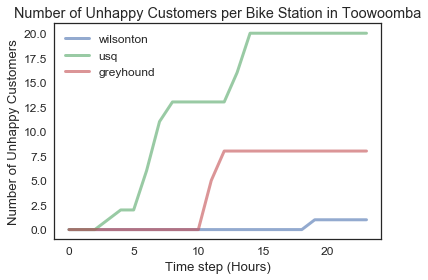

In [7]:
peak_empty()

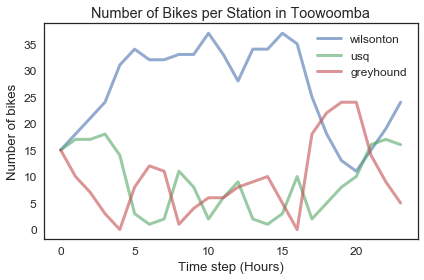

In [8]:
peak_bikes()